# Библиотека pandas

Пакет для статистической обработки данных, по функциональности близкий к R. Включает в себя функциональность работы с базами данных и таблицами Excel.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

## Тип данных Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (например, в этот день термометр сломался или метеоролог был пьян). При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [2]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Основная информация о наборе данных: количество записей, среднее, стандартное отклонение, минимум, нижний квартиль, медиана, верхний квартиль, максимум, а так же тип данных.

In [3]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

В данном примере обычная индексация.

In [4]:
s[2]

5.0

In [5]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [7]:
s1 = s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
s2 = s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [9]:
s1 + s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [10]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность неотрицательных целых чисел 0, 1, 2, ...

In [11]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [12]:
i = list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [13]:
s = pd.Series(l, index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [14]:
s['c']

5.0

Если индекс - строка, то вместо `s['c']` можно писать `s.c`.

In [15]:
s.c

5.0

Набор данных можно создать из словаря.

In [16]:
s = pd.Series({'a':1, 'b':2, 'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [17]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [18]:
d = pd.date_range('20160101', periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
s = pd.Series(sps.norm.rvs(size=10), index=d)
s

2016-01-01    0.195979
2016-01-02    0.489386
2016-01-03    0.392190
2016-01-04    1.153348
2016-01-05    1.529773
2016-01-06   -0.031029
2016-01-07   -0.431075
2016-01-08   -0.705293
2016-01-09   -0.927763
2016-01-10    1.098066
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [20]:
s > 0

2016-01-01     True
2016-01-02     True
2016-01-03     True
2016-01-04     True
2016-01-05     True
2016-01-06    False
2016-01-07    False
2016-01-08    False
2016-01-09    False
2016-01-10     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [21]:
s[s > 0]

2016-01-01    0.195979
2016-01-02    0.489386
2016-01-03    0.392190
2016-01-04    1.153348
2016-01-05    1.529773
2016-01-10    1.098066
dtype: float64

Кумулятивные максимумы - от первого элемента до текущего.

In [22]:
s.cummax()

2016-01-01    0.195979
2016-01-02    0.489386
2016-01-03    0.489386
2016-01-04    1.153348
2016-01-05    1.529773
2016-01-06    1.529773
2016-01-07    1.529773
2016-01-08    1.529773
2016-01-09    1.529773
2016-01-10    1.529773
Freq: D, dtype: float64

Кумулятивные суммы.

In [23]:
s = s.cumsum()
s

2016-01-01    0.195979
2016-01-02    0.685365
2016-01-03    1.077556
2016-01-04    2.230904
2016-01-05    3.760676
2016-01-06    3.729647
2016-01-07    3.298572
2016-01-08    2.593279
2016-01-09    1.665516
2016-01-10    2.763581
Freq: D, dtype: float64

Построим график.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Нужно для новых версий библиотек для преобразования дат
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

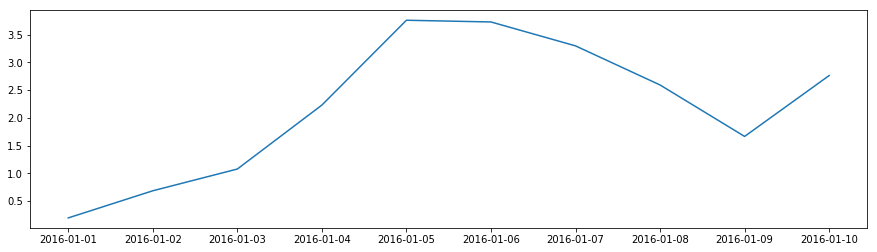

In [25]:
plt.figure(figsize=(15, 4))
plt.plot(s)
plt.show()

## Тип данных DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [26]:
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df

one  two     three
a  0.0    0  2.125882
b  1.0    1 -0.902733
c  2.0    2  1.220038
d  3.0    3  0.721744
e  4.0    4 -0.748400
f  5.0    5 -0.153115
g  NaN    6 -0.143309

Таблица с несколькими разными типами данных

In [27]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1,index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo' })
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [28]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Данные

Вернемся к первой таблице и посмотрим на ее начало и конец

In [29]:
df.head()

one  two     three
a  0.0    0  2.125882
b  1.0    1 -0.902733
c  2.0    2  1.220038
d  3.0    3  0.721744
e  4.0    4 -0.748400

In [30]:
df.tail(3)

one  two     three
e  4.0    4 -0.748400
f  5.0    5 -0.153115
g  NaN    6 -0.143309

Индексы

In [31]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

Названия колонок

In [32]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

Получение обычной матрицы данных

In [33]:
df.values

array([[ 0.        ,  0.        ,  2.12588217],
       [ 1.        ,  1.        , -0.90273343],
       [ 2.        ,  2.        ,  1.22003826],
       [ 3.        ,  3.        ,  0.7217441 ],
       [ 4.        ,  4.        , -0.74840019],
       [ 5.        ,  5.        , -0.15311539],
       [        nan,  6.        , -0.14330919]])

Описательные статистики

In [34]:
df.describe()

one       two     three
count  6.000000  7.000000  7.000000
mean   2.500000  3.000000  0.302872
std    1.870829  2.160247  1.103455
min    0.000000  0.000000 -0.902733
25%    1.250000  1.500000 -0.450758
50%    2.500000  3.000000 -0.143309
75%    3.750000  4.500000  0.970891
max    5.000000  6.000000  2.125882

Транспонирование данных

In [35]:
df.T

a         b         c         d       e         f         g
one    0.000000  1.000000  2.000000  3.000000  4.0000  5.000000       NaN
two    0.000000  1.000000  2.000000  3.000000  4.0000  5.000000  6.000000
three  2.125882 -0.902733  1.220038  0.721744 -0.7484 -0.153115 -0.143309

Сортировка по столбцу

In [36]:
df.sort_values(by='three', ascending=False)

one  two     three
a  0.0    0  2.125882
c  2.0    2  1.220038
d  3.0    3  0.721744
g  NaN    6 -0.143309
f  5.0    5 -0.153115
e  4.0    4 -0.748400
b  1.0    1 -0.902733

### Индексация

В отличии от обычной системы индексации в Python и Numpy, в Pandas принята иная система индексации, которая является несколько нелогичной, однако, на практике часто оказывается удобной при обработке сильно неоднородных данных.
Для написания продуктивного кода при обработке большого объема данных стоит использовать атрибуты `.at`, `.iat`, `.loc`, `.iloc`, `.ix`.

Если в качестве индекса указать имя столбца, получится одномерный набор данных типа Series.

In [37]:
df['one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

К столбцу можно обращаться как к полю объекта, если имя столбца позволяет это сделать

In [38]:
df.one

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Индексы полученного одномерного набора данных

In [39]:
df['one'].index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

У данного столбца есть имя, его можно получить так

In [40]:
df['one'].name

'one'

Получение элемента массива

In [41]:
df['one']['c']

2.0

Правила индексации в pandas несколько отличаются от общепринятых. Если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [42]:
df['b':'d']

one  two     three
b  1.0    1 -0.902733
c  2.0    2  1.220038
d  3.0    3  0.721744

Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [43]:
df[1:3]

one  two     three
b  1.0    1 -0.902733
c  2.0    2  1.220038

Логичнее работает атрибут `loc`: первая позиция -- всегда индекс строки, а вторая -- столбца.

In [44]:
df.loc['b']

one      1.000000
two      1.000000
three   -0.902733
Name: b, dtype: float64

In [45]:
df.loc['b', 'one']

1.0

In [46]:
df.loc['a':'b', 'one']

a    0.0
b    1.0
Name: one, dtype: float64

In [47]:
df.loc['a':'b', :]

one  two     three
a  0.0    0  2.125882
b  1.0    1 -0.902733

In [48]:
df.loc[:, 'one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Атрибут `iloc` подобен `loc`: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона не включается (как обычно в питоне).

In [49]:
df.iloc[2]

one      2.000000
two      2.000000
three    1.220038
Name: c, dtype: float64

In [50]:
df.iloc[1:3]

one  two     three
b  1.0    1 -0.902733
c  2.0    2  1.220038

In [51]:
df.iloc[1:3, 0:2]

one  two
b  1.0    1
c  2.0    2

Булевская индексация -- выбор строк с заданным условием

In [52]:
df[df.three > 0]

one  two     three
a  0.0    0  2.125882
c  2.0    2  1.220038
d  3.0    3  0.721744

### Изменение таблиц

К таблице можно добавлять новые столбцы.

In [53]:
df['4th'] = df['one'] * df['two']
df['flag'] = df['two'] > 2
df

one  two     three   4th   flag
a  0.0    0  2.125882   0.0  False
b  1.0    1 -0.902733   1.0  False
c  2.0    2  1.220038   4.0  False
d  3.0    3  0.721744   9.0   True
e  4.0    4 -0.748400  16.0   True
f  5.0    5 -0.153115  25.0   True
g  NaN    6 -0.143309   NaN   True

И удалять имеющиеся.

In [54]:
del df['two']
# лучше функцию drop
df['foo'] = 0
df

one     three   4th   flag  foo
a  0.0  2.125882   0.0  False    0
b  1.0 -0.902733   1.0  False    0
c  2.0  1.220038   4.0  False    0
d  3.0  0.721744   9.0   True    0
e  4.0 -0.748400  16.0   True    0
f  5.0 -0.153115  25.0   True    0
g  NaN -0.143309   NaN   True    0

Изменение элемента

In [55]:
df.iat[1, 0] = -1

# Эквивалентные формы:
# df['one']['b'] = -1  <--  SettingWithCopyWarning
# df.at['b', 'one'] = -1

df

one     three   4th   flag  foo
a  0.0  2.125882   0.0  False    0
b -1.0 -0.902733   1.0  False    0
c  2.0  1.220038   4.0  False    0
d  3.0  0.721744   9.0   True    0
e  4.0 -0.748400  16.0   True    0
f  5.0 -0.153115  25.0   True    0
g  NaN -0.143309   NaN   True    0

Добавим копию столбца `one`, в которую входят только строки до третьей.

In [56]:
df['one_tr'] = df['one'][:3]
df

one     three   4th   flag  foo  one_tr
a  0.0  2.125882   0.0  False    0     0.0
b -1.0 -0.902733   1.0  False    0    -1.0
c  2.0  1.220038   4.0  False    0     2.0
d  3.0  0.721744   9.0   True    0     NaN
e  4.0 -0.748400  16.0   True    0     NaN
f  5.0 -0.153115  25.0   True    0     NaN
g  NaN -0.143309   NaN   True    0     NaN

### Пропуски

Удаление всех строк с пропусками

In [57]:
df.dropna(how='any')

one     three  4th   flag  foo  one_tr
a  0.0  2.125882  0.0  False    0     0.0
b -1.0 -0.902733  1.0  False    0    -1.0
c  2.0  1.220038  4.0  False    0     2.0

Замена всех пропусков на значение

In [58]:
df.fillna(value=666)

one     three    4th   flag  foo  one_tr
a    0.0  2.125882    0.0  False    0     0.0
b   -1.0 -0.902733    1.0  False    0    -1.0
c    2.0  1.220038    4.0  False    0     2.0
d    3.0  0.721744    9.0   True    0   666.0
e    4.0 -0.748400   16.0   True    0   666.0
f    5.0 -0.153115   25.0   True    0   666.0
g  666.0 -0.143309  666.0   True    0   666.0

Замена всех пропусков на среднее по столбцу

In [59]:
df.fillna(value=df.mean())

one     three        4th   flag  foo    one_tr
a  0.000000  2.125882   0.000000  False    0  0.000000
b -1.000000 -0.902733   1.000000  False    0 -1.000000
c  2.000000  1.220038   4.000000  False    0  2.000000
d  3.000000  0.721744   9.000000   True    0  0.333333
e  4.000000 -0.748400  16.000000   True    0  0.333333
f  5.000000 -0.153115  25.000000   True    0  0.333333
g  2.166667 -0.143309   9.166667   True    0  0.333333

Булевская маска пропущенных значений

In [60]:
df.isnull()

one  three    4th   flag    foo  one_tr
a  False  False  False  False  False   False
b  False  False  False  False  False   False
c  False  False  False  False  False   False
d  False  False  False  False  False    True
e  False  False  False  False  False    True
f  False  False  False  False  False    True
g   True  False   True  False  False    True

### Простые операции

Можно объединять таблицы по вертикали и по горизонтали.

In [61]:
df2 = pd.DataFrame({'one': {'h':0, 'i':1}, 'one_tr': {'h':2}})
df2

one  one_tr
h    0     2.0
i    1     NaN

In [62]:
# sort -- сортировать ли колонки
pd.concat([df, df2], sort=False)

one     three   4th   flag  foo  one_tr
a  0.0  2.125882   0.0  False  0.0     0.0
b -1.0 -0.902733   1.0  False  0.0    -1.0
c  2.0  1.220038   4.0  False  0.0     2.0
d  3.0  0.721744   9.0   True  0.0     NaN
e  4.0 -0.748400  16.0   True  0.0     NaN
f  5.0 -0.153115  25.0   True  0.0     NaN
g  NaN -0.143309   NaN   True  0.0     NaN
h  0.0       NaN   NaN    NaN  NaN     2.0
i  1.0       NaN   NaN    NaN  NaN     NaN

In [63]:
df2 = pd.DataFrame({'5th': {'a':0, 'b':1}, '6th': {'c':2, 'd':3}})
df2

5th  6th
a  0.0  NaN
b  1.0  NaN
c  NaN  2.0
d  NaN  3.0

In [64]:
pd.concat([df, df2], axis=1, sort=False)

one     three   4th   flag  foo  one_tr  5th  6th
a  0.0  2.125882   0.0  False    0     0.0  0.0  NaN
b -1.0 -0.902733   1.0  False    0    -1.0  1.0  NaN
c  2.0  1.220038   4.0  False    0     2.0  NaN  2.0
d  3.0  0.721744   9.0   True    0     NaN  NaN  3.0
e  4.0 -0.748400  16.0   True    0     NaN  NaN  NaN
f  5.0 -0.153115  25.0   True    0     NaN  NaN  NaN
g  NaN -0.143309   NaN   True    0     NaN  NaN  NaN

Создадим таблицу из массива случайных чисел.

In [65]:
df = pd.DataFrame(sps.uniform.rvs(size=(10, 4)), columns=['A', 'B', 'C', 'D'])
df

A         B         C         D
0  0.678585  0.915202  0.617574  0.664630
1  0.016284  0.799684  0.073602  0.719169
2  0.043420  0.595716  0.477904  0.193976
3  0.157707  0.927056  0.009625  0.430093
4  0.982407  0.794015  0.049709  0.168353
5  0.949959  0.226124  0.877527  0.293291
6  0.158505  0.646157  0.480829  0.909035
7  0.689422  0.226955  0.017889  0.874429
8  0.668554  0.111046  0.034199  0.406791
9  0.608598  0.166885  0.266122  0.381810

In [66]:
df2 = pd.DataFrame(sps.uniform.rvs(size=(7, 3)), columns=['A', 'B', 'C'])
df + df2

A         B         C   D
0  1.553901  1.543326  0.913195 NaN
1  0.412995  1.302734  0.714922 NaN
2  0.373582  0.803259  0.728918 NaN
3  0.667300  1.088480  0.146959 NaN
4  1.144856  1.388146  0.099717 NaN
5  1.405569  1.140137  1.697069 NaN
6  0.604990  0.735354  1.269650 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN

In [67]:
2 * df + 3

A         B         C         D
0  4.357169  4.830404  4.235149  4.329261
1  3.032568  4.599368  3.147204  4.438338
2  3.086841  4.191432  3.955807  3.387953
3  3.315415  4.854112  3.019250  3.860186
4  4.964813  4.588030  3.099418  3.336706
5  4.899918  3.452249  4.755054  3.586582
6  3.317010  4.292313  3.961659  4.818069
7  4.378844  3.453910  3.035779  4.748858
8  4.337109  3.222091  3.068398  3.813583
9  4.217195  3.333769  3.532243  3.763621

In [68]:
np.sin(df)

A         B         C         D
0  0.627692  0.792686  0.579059  0.616768
1  0.016283  0.717136  0.073535  0.658760
2  0.043407  0.561101  0.459919  0.192762
3  0.157055  0.799856  0.009625  0.416955
4  0.831836  0.713174  0.049689  0.167559
5  0.813392  0.224202  0.769161  0.289104
6  0.157842  0.602122  0.462515  0.788911
7  0.636091  0.225012  0.017889  0.767177
8  0.619852  0.110818  0.034192  0.395665
9  0.571717  0.166111  0.262991  0.372601

In [69]:
df.describe()

A          B          C          D
count  10.000000  10.000000  10.000000  10.000000
mean    0.495344   0.540884   0.290498   0.504158
std     0.368053   0.326028   0.306855   0.270058
min     0.016284   0.111046   0.009625   0.168353
25%     0.157907   0.226332   0.038077   0.315421
50%     0.638576   0.620936   0.169862   0.418442
75%     0.686713   0.798267   0.480098   0.705534
max     0.982407   0.927056   0.877527   0.909035

Построим графики кумулятивных сумм

In [70]:
cs = df.cumsum()
cs

A         B         C         D
0  0.678585  0.915202  0.617574  0.664630
1  0.694869  1.714886  0.691176  1.383799
2  0.738289  2.310602  1.169080  1.577776
3  0.895997  3.237658  1.178705  2.007869
4  1.878403  4.031673  1.228414  2.176222
5  2.828362  4.257798  2.105941  2.469513
6  2.986867  4.903954  2.586771  3.378547
7  3.676289  5.130909  2.604660  4.252976
8  4.344843  5.241955  2.638859  4.659768
9  4.953441  5.408839  2.904981  5.041578

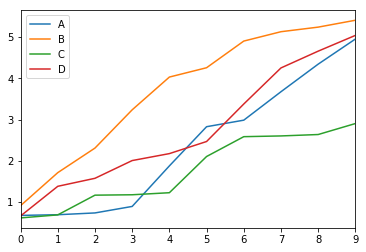

In [71]:
cs.plot()
plt.show()

### Чтение данных

Загрузка текстовых файлов табличного вида производится с помощью функции `pd.read_csv`. Основные аргументы следующие:
* `filepath_or_buffer` --- пусть к файлу;
* `sep` --- разделитель колонок в строке (запятая, табуляция и т.д.);
* `header` --- номер строки или список номеров строк, используемых в качестве имен колонок;
* `names` --- список имен, которые будут использованы в качестве имен колонок;
* `index_col` --- колонка, используемая в качестве индекса;
* `usecols` --- список имен колонок, которые будут загружены;
* `nrows` --- сколько строк прочитать;
* `skiprows` --- номера строк с начала, которые нужно пропустить;
* `skipfooter` --- сколько строк в конце пропустить;
* `na_values` --- список значений, которые распознавать как пропуски;
* `parse_dates` --- распознавать ли даты, можно передать номера строк;
* `date_parser` --- парсер дат;
* `dayfirst` --- день записывается перед месяцем или после;
* `thousands` --- разделитель тысяч;
* `decimal` --- разделитель целой и дробной частей;
* `comment` --- символ начала комментария.

Полный список параметров:

`pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)`

Загрузка таблиц формата Excel

Загрузка таблиц формата Excel производится с помощью функции `pd.read_excel`. Основные аргументы следующие:
* `io` --- пусть к файлу;
* `sheetname` --- какие листы таблицы загрузить;
* Остальные параметры аналогично.

`pd.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)`

### Запись данных

Запись таблицы в текстовый файл производится с помощью функции `df.to_csv`. Основные аргументы следующие:
* `df` --- DataFrame, который нужно записать;
* `path_or_buf` --- путь, куда записать;
* `sep` --- разделитель колонок в строке (запятая, табуляция и т.д.);
* `na_rep` --- как записать пропуски;
* `float_format` --- формат записи дробных чисел;
* `columns` --- какие колонки записать;
* `header` --- как назвать колонки при записи;
* `index` --- записывать ли индексы в файл;
* `index_label` --- имена индексов, которые записать в файл.

Полный список параметров:

`df.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')`

Запись таблицы в формат Excel производится с помощью функции `df.to_excel`. Основные аргументы аналогичные. Полный список параметров:

`df.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None)`

### Примеры чтения данных и работы с датами

Прочитаем файл, который содержит два столбца -- дата и число. Столбцы разделяются табуляцией.

In [72]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0])
df.head()

Time  Value
0 2019-01-09     66
1 2019-02-09     34
2 2019-03-09     18
3 2019-04-09     32
4 2019-05-09     84

В информации о таблице видим, что дата определилась, т.к. формат колонки `Time` обозначен как `datetime64[ns]`.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null datetime64[ns]
Value    18 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 368.0 bytes


Но при печати понимаем, что часть дат распозналась неправильно. Если число месяца меньше 13, то pandas путает день и месяц. В одном и том же столбце. Кошмар...

In [74]:
df['Time']

0    2019-01-09
1    2019-02-09
2    2019-03-09
3    2019-04-09
4    2019-05-09
5    2019-06-09
6    2019-07-09
7    2019-08-09
8    2019-09-09
9    2019-10-09
10   2019-11-09
11   2019-12-09
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Укажем, что день всегда следует первым. Теперь все правильно

In [75]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0], dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Панды довольно ленивые, и если не попросить pandas распознать дату, то ничего делать не будет -- оставит ее как `object`.

In [76]:
df = pd.read_csv('./example.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null object
Value    18 non-null int64
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


Тогда можно воспользоваться функцией `pd.to_datetime`

In [77]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Установим дату как индекс, получив временной ряд (привет весеннему семестру!)

In [78]:
df = df.set_index('Time')
df

Value
Time             
2019-09-01     66
2019-09-02     34
2019-09-03     18
2019-09-04     32
2019-09-05     84
2019-09-06     27
2019-09-07     45
2019-09-08     84
2019-09-09     42
2019-09-10     65
2019-09-11     65
2019-09-12     73
2019-09-13     24
2019-09-14     62
2019-09-15     44
2019-09-16     25
2019-09-17     75
2019-09-18     23

Его можно нарисовать

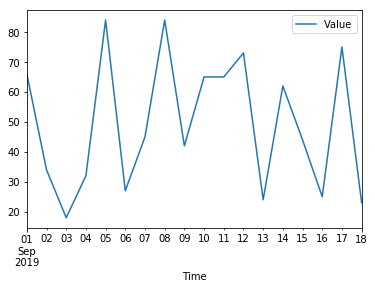

In [79]:
df.plot();

Усреднение данных по трем дням

In [80]:
df.resample('3D').mean()

Value
Time                 
2019-09-01  39.333333
2019-09-04  47.666667
2019-09-07  57.000000
2019-09-10  67.666667
2019-09-13  43.333333
2019-09-16  41.000000

### Интервалы времени

Интервал времени задается объектом `pd.Timedelta`

Возможные обозначения интервалов: `'Y', 'M', 'W', 'D', 'days', 'day', 'hours', hour', 'hr', 'h', 'm', 'minute', 'min', 'minutes', 'T', 'S', 'seconds', 'sec', 'second', 'ms', 'milliseconds', 'millisecond', 'milli', 'millis', 'L', 'us', 'microseconds', 'microsecond', 'micro', 'micros', 'U', 'ns', 'nanoseconds', 'nano', 'nanos', 'nanosecond', 'N'`

Например, интервал времени в 3 года 34 дня 5 часов 37 минут 23 секунды 12 милисекунд:

In [81]:
pd.Timedelta('3Y 34days 5hr 37min 21sec 12ms')

Timedelta('1129 days 23:04:57.012000')

Почему так странно? Один год по версии pandas длится столько времени:

In [82]:
pd.Timedelta('1Y')

Timedelta('365 days 05:49:12')

Так сделано из-за високосных годов и из-за того, что обычный год длится на пару минут меньше 365 дней. Поскольку месяцы разной длины, то их вообще нельзя здесь задать.

Интервал можно добавить к какой-нибудь дате, или вычесть из нее

In [83]:
pd.to_datetime('2019.09.18 18:30') + pd.Timedelta('3Y 5M 21days 5hr 37min 23sec 12ms')

Timestamp('2022-10-09 17:39:59.012000')

In [84]:
pd.to_datetime('2019.09.18 18:30') - pd.Timedelta('3Y 5M 21days 5hr 37min 23sec 12ms')

Timestamp('2016-08-27 19:20:00.988000')

Сделать регулярный список дат позволяет функция `pd.timedelta_range`, которая реализует функционал `range` для дат. Ей нужно передать **ровно три аргумента** из следующих четырех:
* `start` --- интервал начала отчета;
* `end` --- интервал окончания отчета;
* `periods` --- количество интервалов;
* `freq` --- частота отсчета.

Например, лекции по статистике проходят раз в неделю в течении 16 недель. Если мы отсчитываем первую лекцию от текущего момента, то интервалы будут такими:

In [85]:
pd.timedelta_range(start=0, freq='7D', periods=16)

TimedeltaIndex([  '0 days',   '7 days',  '14 days',  '21 days',  '28 days',
                 '35 days',  '42 days',  '49 days',  '56 days',  '63 days',
                 '70 days',  '77 days',  '84 days',  '91 days',  '98 days',
                '105 days'],
               dtype='timedelta64[ns]', freq='7D')

Указав дату "текущего момента", добавим к ней наши интервалы, получив моменты времени начала лекций.

Как видим, одна лекция выпадает на праздник 4 ноября, так что придется переносить.

In [86]:
pd.to_datetime('2019.09.02 17:50') + pd.timedelta_range(start=0, freq='7D', 
                                                        periods=16)

DatetimeIndex(['2019-09-02 17:50:00', '2019-09-09 17:50:00',
               '2019-09-16 17:50:00', '2019-09-23 17:50:00',
               '2019-09-30 17:50:00', '2019-10-07 17:50:00',
               '2019-10-14 17:50:00', '2019-10-21 17:50:00',
               '2019-10-28 17:50:00', '2019-11-04 17:50:00',
               '2019-11-11 17:50:00', '2019-11-18 17:50:00',
               '2019-11-25 17:50:00', '2019-12-02 17:50:00',
               '2019-12-09 17:50:00', '2019-12-16 17:50:00'],
              dtype='datetime64[ns]', freq='7D')

Чтобы узнать, сколько времени прошло между окончанием первой лекции и началом второй, можем вычесть из одной даты другую

In [87]:
pd.to_datetime('2019.09.09 17:50') - pd.to_datetime('2019.09.02 20:00')

Timedelta('6 days 21:50:00')

-----

Статистика, прикладной поток 2019

Никита Волков

https://mipt-stats.gitlab.io/

Частично использованы материалы http://www.inp.nsk.su/~grozin/python/pandas.html и http://pandas.pydata.org/pandas-docs/stable/10min.html